# **DEEP LEARNING**

*APLICACIÓN DE UNA RED NEURONAL RECURRENTE*

Proyecto: Google Stock Price Prediction

By:Brandon Yahir Arriaga Tlapa



El conjunto de datos consta de precios históricos de acciones de Google, con diversos atributos como precio de apertura, máximo, mínimo, cierre y volumen. Para este estudio, solo se utiliza el precio de cierre, ya que es una métrica crucial en el análisis financiero y la previsión de acciones.


# **Objetivo del Proyecto**

El objetivo principal de este proyecto es predecir el precio de cierre de las acciones de Google (GOOG) utilizando una red neuronal recurrente del tipo LSTM (Long Short-Term Memory). Para ello, se emplea un conjunto de datos históricos que abarca desde 2016 hasta 2021, centrándose en el precio de cierre como variable clave. El modelo busca capturar patrones temporales en los datos financieros, con el fin de generar predicciones precisas que puedan ser útiles para la toma de decisiones en el ámbito de inversiones y análisis bursátil. Además, se evalúa el rendimiento del modelo mediante métricas como el Error Absoluto Medio (MAE) y el Error Cuadrático Medio (RMSE).


# **Cargar y explorar datos**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df=pd.read_csv("/content/GOOG.csv",parse_dates=["date"],index_col="date")
df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


In [5]:
print('Valores de filas duplicadas: ' , len(df[df.duplicated()]))

Valores de filas duplicadas:  0


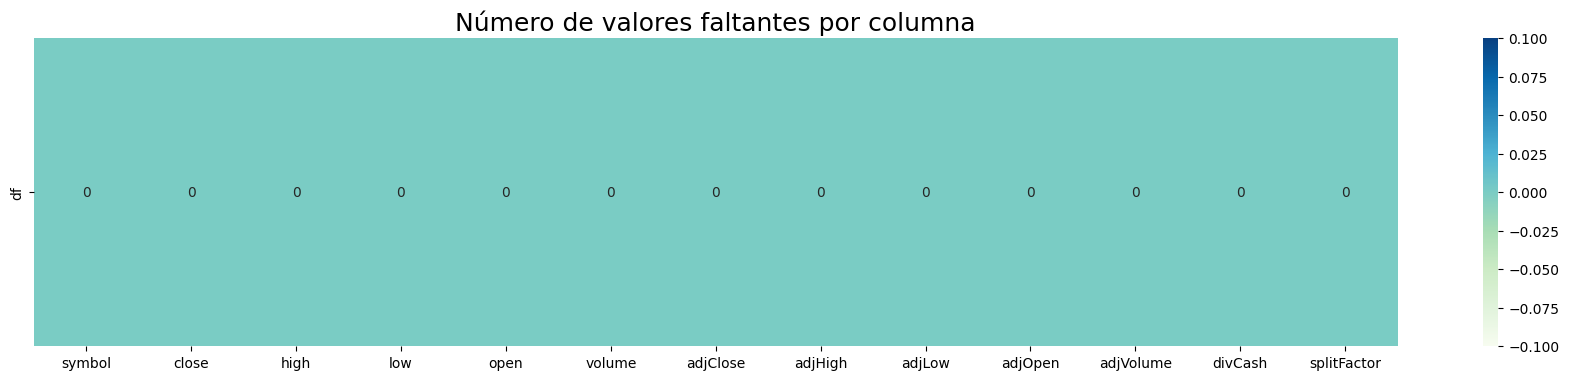

In [6]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='df').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Número de valores faltantes por columna', fontsize=18)
plt.show()

# **Estadística descriptiva del dataset**

In [7]:
df.describe().T.style.background_gradient(cmap='GnBu',axis=1)

,count,mean,std,min,25%,50%,75%,max
close,1258.000000,1216.317067,383.333358,668.260000,960.802500,1132.460000,1360.595000,2521.600000
high,1258.000000,1227.430934,387.570872,672.300000,968.757500,1143.935000,1374.345000,2526.990000
low,1258.000000,1204.176430,378.777094,663.284000,952.182500,1117.915000,1348.557500,2498.290000
open,1258.000000,1215.260779,382.446995,671.000000,959.005000,1131.150000,1361.075000,2524.920000
volume,1258.000000,1601590.091415,696017.226844,346753.000000,1173521.500000,1412588.500000,1812156.000000,6207027.000000
adjClose,1258.000000,1216.317067,383.333358,668.260000,960.802500,1132.460000,1360.595000,2521.600000
adjHigh,1258.000000,1227.430936,387.570873,672.300000,968.757500,1143.935000,1374.345000,2526.990000
adjLow,1258.000000,1204.176436,378.777099,663.284000,952.182500,1117.915000,1348.557500,2498.290000
adjOpen,1258.000000,1215.260779,382.446995,671.000000,959.005000,1131.150000,1361.075000,2524.920000
adjVolume,1258.000000,1601590.091415,696017.226844,346753.000000,1173521.500000,1412588.500000,1812156.000000,6207027.000000


In [8]:
#Dataframe only numeric
df_numeric=df.select_dtypes(include=np.number)
df_numeric.drop(columns=["divCash","splitFactor"],inplace=True)



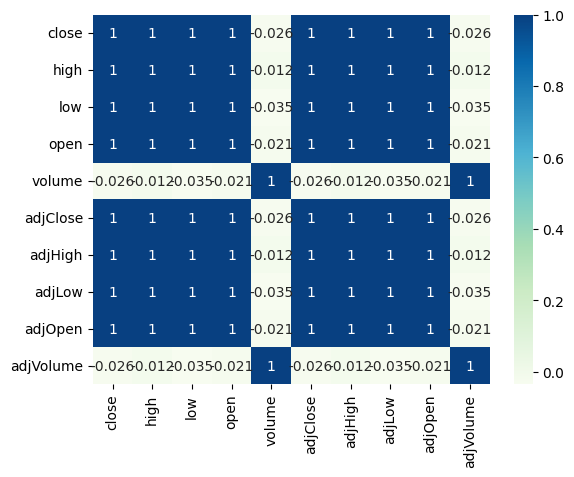

In [9]:
#Mapa de calor de correlacion
sns.heatmap(df_numeric.corr(),cmap='GnBu',annot=True)
plt.show()


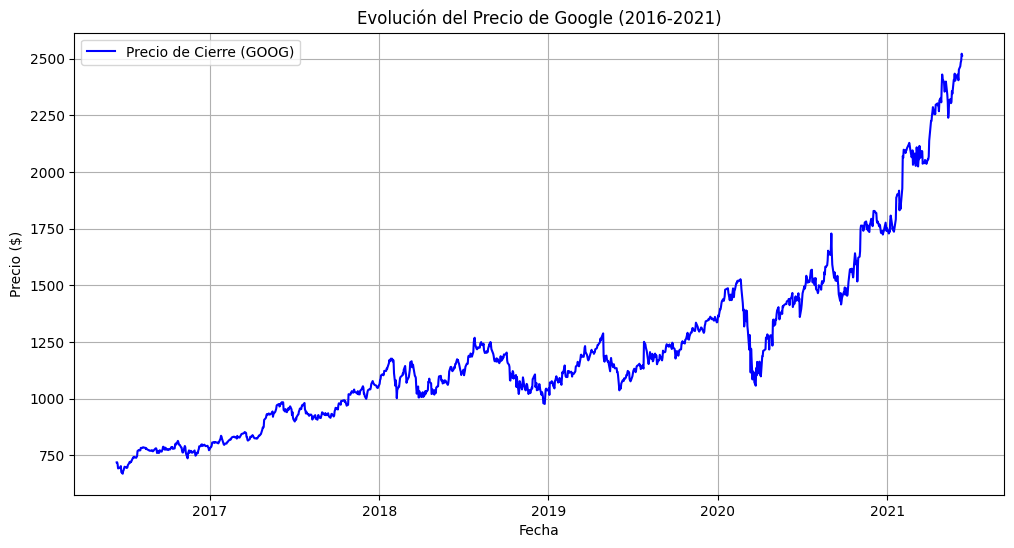

In [10]:

plt.figure(figsize=(12, 6))
plt.plot(df['close'], color='blue', label='Precio de Cierre (GOOG)')
plt.title('Evolución del Precio de Google (2016-2021)')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid()
plt.show()

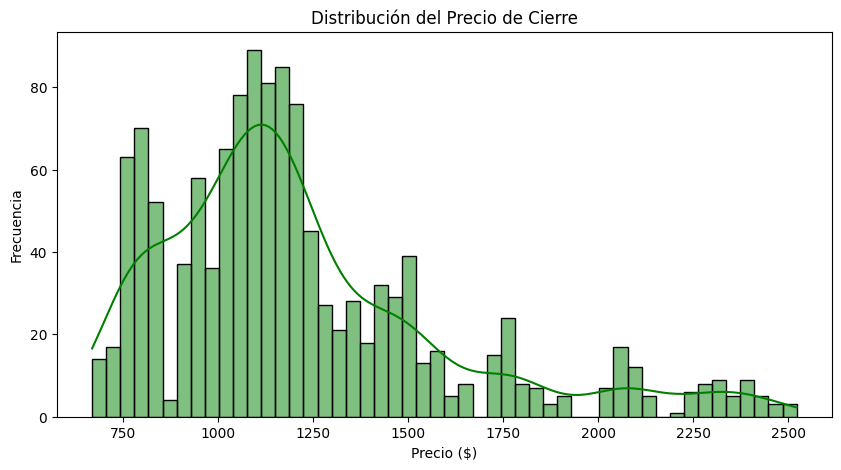

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], kde=True, bins=50, color='green')
plt.title('Distribución del Precio de Cierre')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

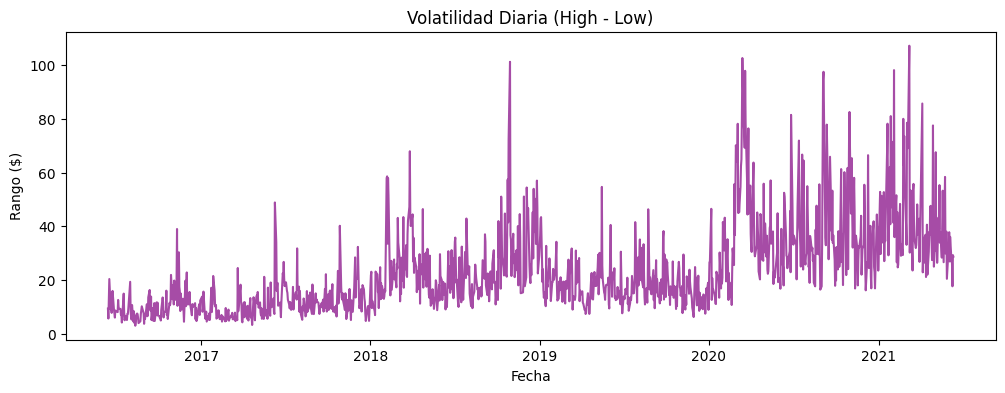

In [12]:
df['daily_range'] = df['high'] - df['low']  # Volatilidad intradía

plt.figure(figsize=(12, 4))
plt.plot(df['daily_range'], color='purple', alpha=0.7)
plt.title('Volatilidad Diaria (High - Low)')
plt.xlabel('Fecha')
plt.ylabel('Rango ($)')
plt.show()

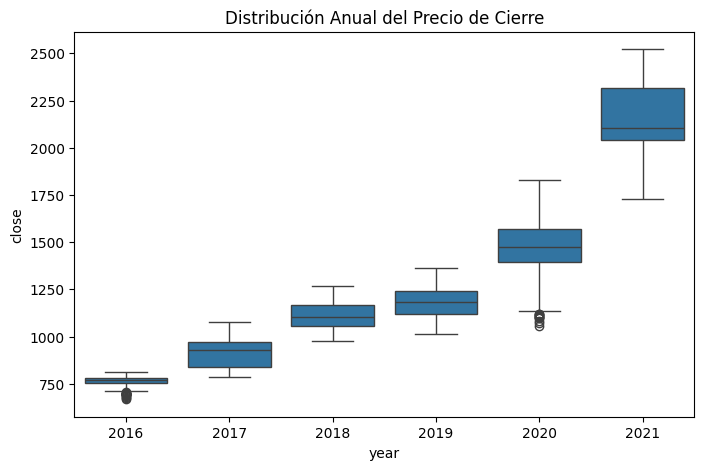

In [13]:
df['year'] = df.index.year  # Extraer el año

plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='close', data=df)
plt.title('Distribución Anual del Precio de Cierre')
plt.show()

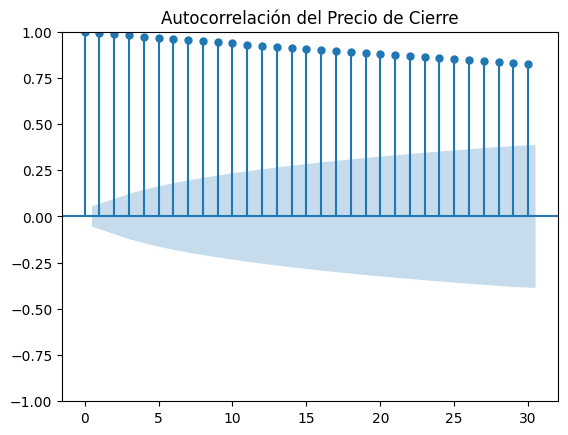

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['close'], lags=30)  # Autocorrelación hasta 30 días
plt.title('Autocorrelación del Precio de Cierre')
plt.show()

## **Implementación de la red neuronal recurrente del tipo LSTM**

In [23]:

# Cargar datos
df = pd.read_csv("/content/GOOG.csv", parse_dates=["date"], index_col="date")

# Seleccionar solo el precio de cierre
close_data = df[['close']].values

# Normalización
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(close_data)

# División train-test (80-20)
train_data, test_data = train_test_split(normalized_data, test_size=0.2, shuffle=False)

# Función para generar secuencias (solo close price)
def generate_sequences(data, seq_length=50):
    sequences = []
    labels = []

    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])

    return np.array(sequences), np.array(labels)

# Generar secuencias para entrenamiento y prueba
train_sequences, train_labels = generate_sequences(train_data)
test_sequences, test_labels = generate_sequences(test_data)

# Modelo LSTM simplificado
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(50, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Solo una salida para el precio de cierre
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Entrenamiento
history = model.fit(
    train_sequences,
    train_labels,
    epochs=200,
    batch_size=30,
    validation_data=(test_sequences, test_labels),
    verbose=1
)



Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0174 - mean_absolute_error: 0.1034 - val_loss: 0.0611 - val_mean_absolute_error: 0.2324
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0026 - mean_absolute_error: 0.0391 - val_loss: 0.0043 - val_mean_absolute_error: 0.0530
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0014 - mean_absolute_error: 0.0281 - val_loss: 0.0060 - val_mean_absolute_error: 0.0651
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012 - mean_absolute_error: 0.0250 - val_loss: 0.0041 - val_mean_absolute_error: 0.0516
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0011 - mean_absolute_error: 0.0235 - val_loss: 0.0061 - val_mean_absolute_error: 0.0653
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - val_loss: 0.0081 - val_mean_absolute_error: 0.0772
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - mean_absolute_error: 0.0237 - val_loss: 0

# **Estructura de la Red Neuronal Recurrente (LSTM)**

## **Arquitectura del Modelo**
El modelo implementado consta de las siguientes capas:
1. **Capa LSTM (50 unidades, return_sequences=True)**:  
   - Esta capa procesa secuencias de 50 pasos temporales y devuelve una secuencia completa para alimentar la siguiente capa LSTM.  
   - **Función de activación**: Tanh (por defecto en LSTM).  
   - **Dropout (0.2)**: Regularización para evitar el sobreajuste, eliminando aleatoriamente el 20% de las neuronas durante el entrenamiento.

2. **Capa LSTM (50 unidades, return_sequences=True)**:  
   - Segunda capa LSTM para profundizar en el aprendizaje de patrones temporales.  
   - **Dropout (0.2)**: Igual que la capa anterior.

3. **Capa LSTM (50 unidades)**:  
   - Última capa LSTM que devuelve solo la salida final (no secuencias).  
   - **Dropout (0.2)**: Mismo propósito de regularización.

4. **Capa Densa (1 unidad)**:  
   - Capa de salida con una neurona para predecir el precio de cierre.  
   - **Función de activación**: Lineal (para problemas de regresión).

## **Optimizador y Parámetros**
- **Optimizador**: Adam  
  - Se eligió Adam por su eficiencia en ajustar automáticamente la tasa de aprendizaje y su buen rendimiento en problemas de series temporales.  
  - **Tasa de aprendizaje**: Valor por defecto (0.001).  

- **Función de Pérdida**: Mean Squared Error (MSE)  
  - Ideal para problemas de regresión, ya que penaliza errores grandes más que los pequeños.  

- **Métricas Adicionales**: Mean Absolute Error (MAE)  
  - Proporciona una interpretación intuitiva del error en términos del precio real de las acciones.  

- **Entrenamiento**:  
  - **Épocas**: 200 (suficientes para converger sin sobreajuste).  
  - **Batch Size**: 30 (balance entre velocidad y estabilidad).  
  - **Validación**: 20% de los datos reservados para evaluar el rendimiento durante el entrenamiento.  


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


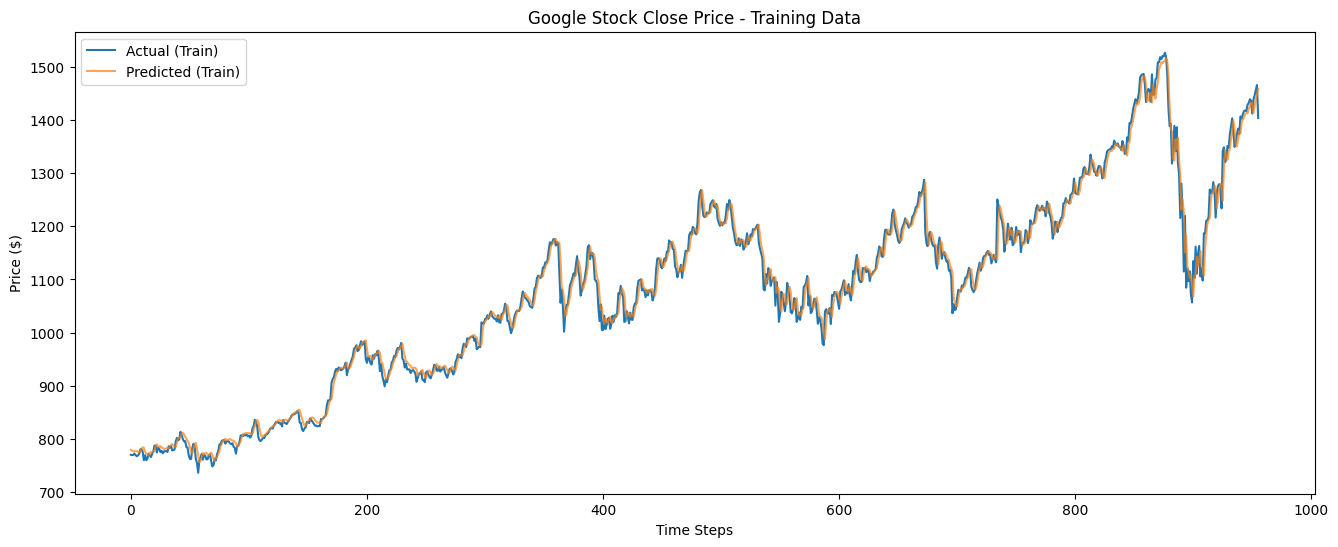

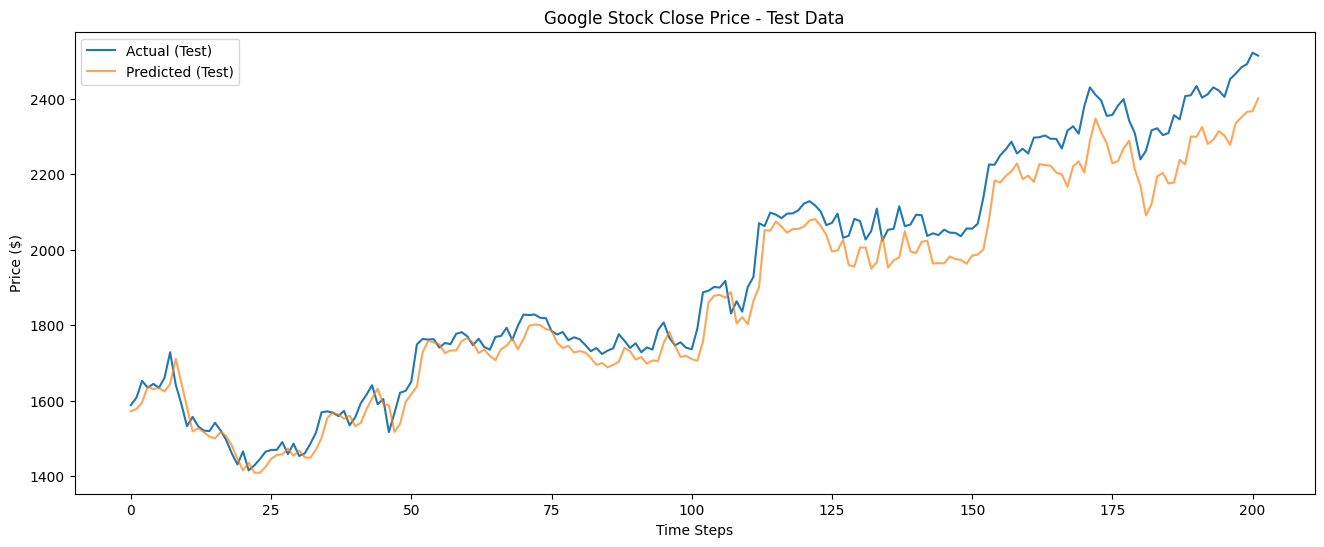

In [24]:
# Predicciones
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)

# Invertir la normalización para visualización
train_predictions = scaler.inverse_transform(train_predictions)
train_labels = scaler.inverse_transform(train_labels)
test_predictions = scaler.inverse_transform(test_predictions)
test_labels = scaler.inverse_transform(test_labels)

# Visualización
plt.figure(figsize=(16, 6))
plt.plot(train_labels, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)', alpha=0.7)
plt.title('Google Stock Close Price - Training Data')
plt.xlabel('Time Steps')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(test_labels, label='Actual (Test)')
plt.plot(test_predictions, label='Predicted (Test)', alpha=0.7)
plt.title('Google Stock Close Price - Test Data')
plt.xlabel('Time Steps')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [26]:


# Calcular métricas para test
test_mae = mean_absolute_error(test_labels, test_predictions)
test_mse = mean_squared_error(test_labels, test_predictions)
test_rmse = np.sqrt(test_mse)

print(f"Test MAE: ${test_mae:.2f}")
print(f"Test RMSE: ${test_rmse:.2f}")

Test MAE: $58.84
Test RMSE: $74.22


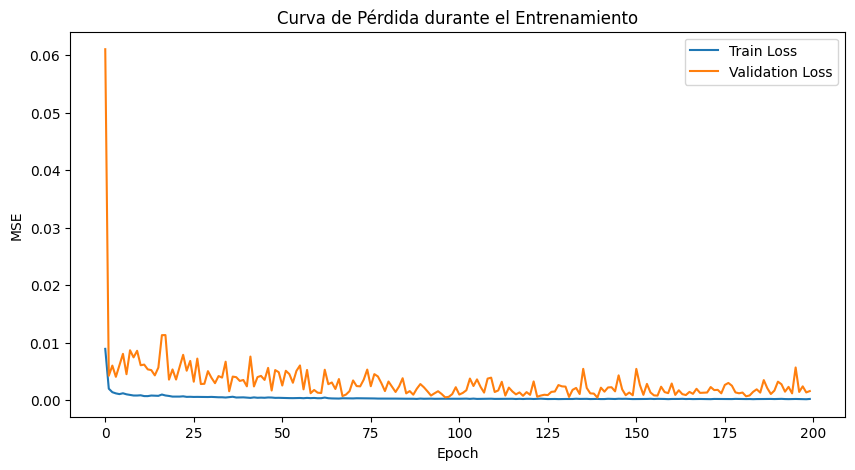

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()